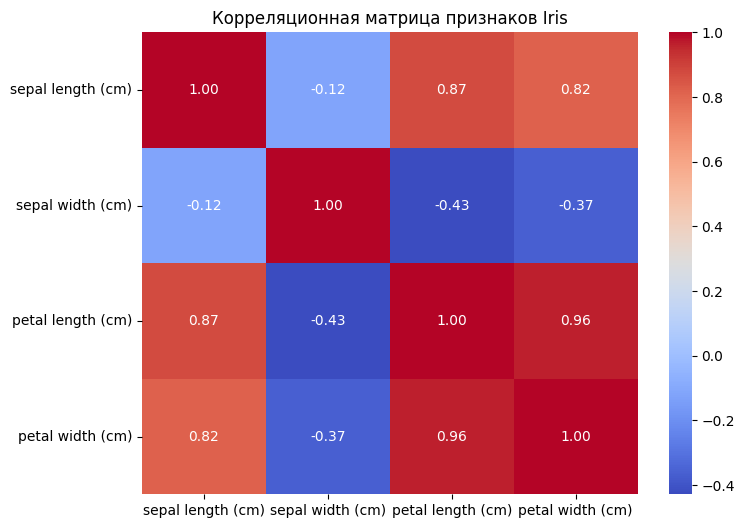

In [2]:
# Задание 1: Работа с корреляционной матрицей.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

corr_matrix = iris_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Корреляционная матрица Iris")
plt.show()


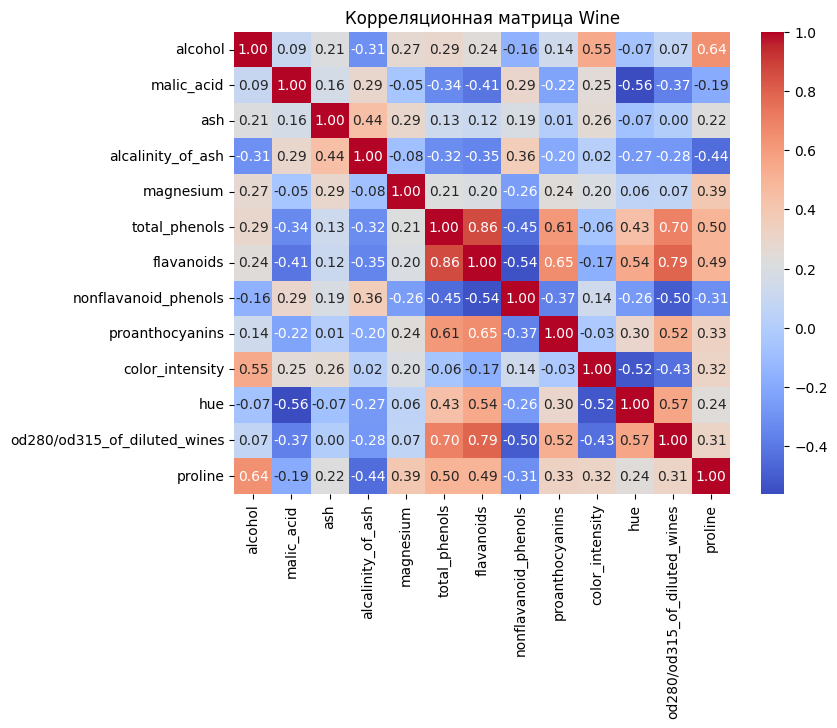

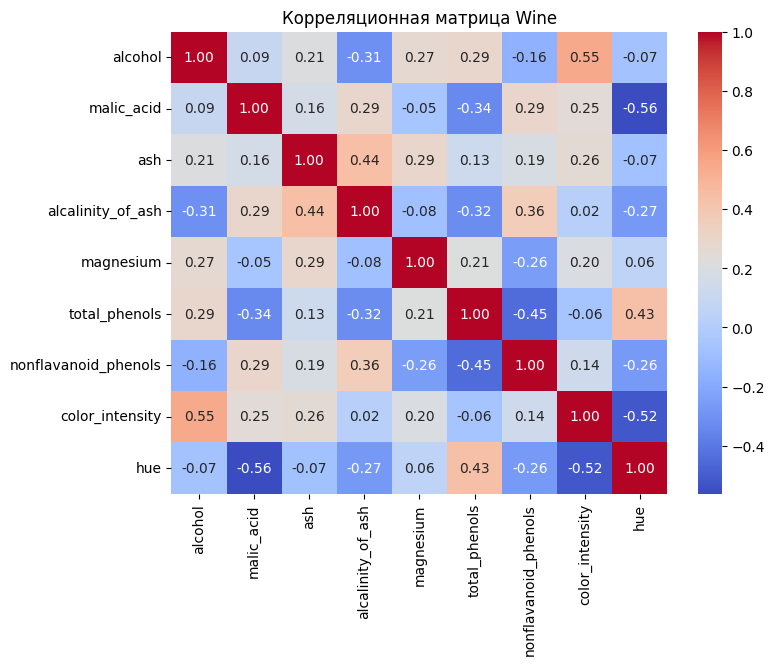

In [5]:
# Задание 2. Исключение мультиколлинеарных признаков

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

wine = load_wine()

gain = 0.6

wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)

corr_matrix = wine_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Корреляционная матрица Wine")
plt.show()

upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > gain)]

wine_df = wine_df.drop(columns=to_drop)

plt.figure(figsize=(8, 6))
sns.heatmap(wine_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Корреляционная матрица Wine")
plt.show()


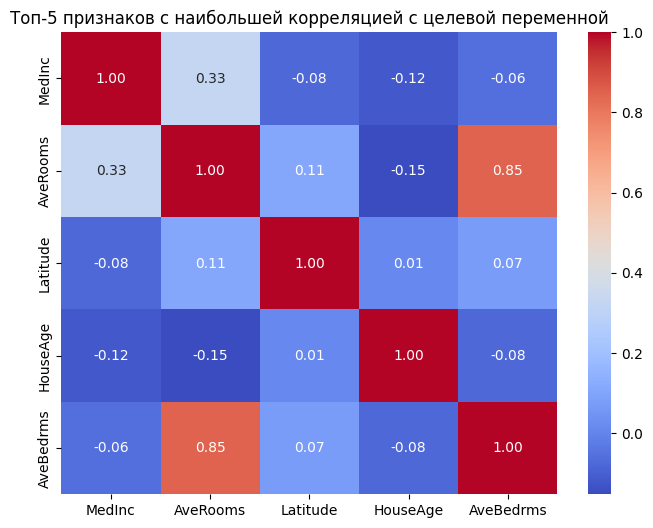

In [8]:
# Задание 3: Выбор наиболее значимых признаков.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

cl = fetch_california_housing()

cl_df = pd.DataFrame(cl.data, columns=cl.feature_names)
cl_df['TARGET'] = cl.target

corr_with_target = cl_df.corr()['TARGET'].abs().sort_values(ascending=False)

n = 5

top_features = corr_with_target.index[1:n+1]

plt.figure(figsize=(8, 6))
sns.heatmap(cl_df[top_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title(f"{n} признаков с наибольшей корреляцией с целевой переменной")
plt.show()

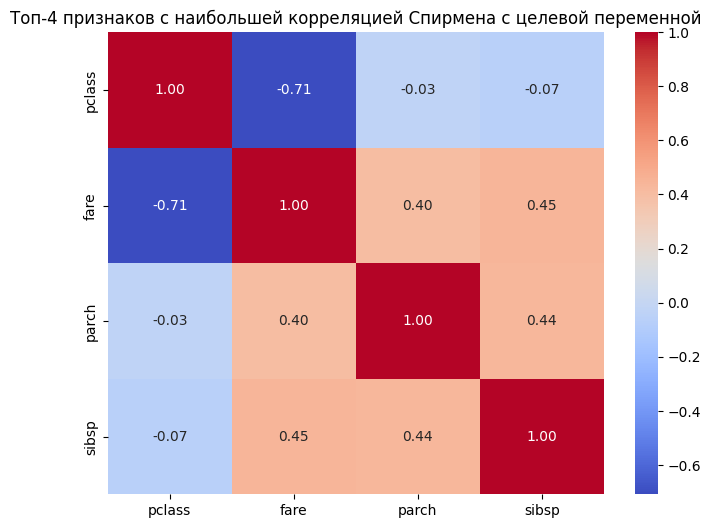

In [10]:
# Задание 4. Применение Ранговой корреляции Спирмена

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

titanic = fetch_openml(name='titanic', version=1, as_frame=True)

titanic_df = titanic.data[['pclass', 'age', 'sibsp', 'parch', 'fare']].copy()
titanic_df['survived'] = titanic.target.astype(int)

spearman_corr = titanic_df.corr(method='spearman')['survived'].abs().sort_values(ascending=False)

n = 4

top_features = spearman_corr.index[1:n+1]

plt.figure(figsize=(8, 6))
sns.heatmap(titanic_df[top_features].corr(method='spearman'), annot=True, cmap='coolwarm', fmt='.2f')
plt.title(f"{n} признаков с наибольшей корреляцией Спирмена с целевой переменной")
plt.show()


Сравнение методов отбора признаков:
           Pearson  Spearman
age       0.043818  0.030737
fare      0.244414  0.293953
parch     0.082660  0.162086
pclass    0.312469  0.309734
sibsp     0.027825  0.083620
survived  1.000000  1.000000


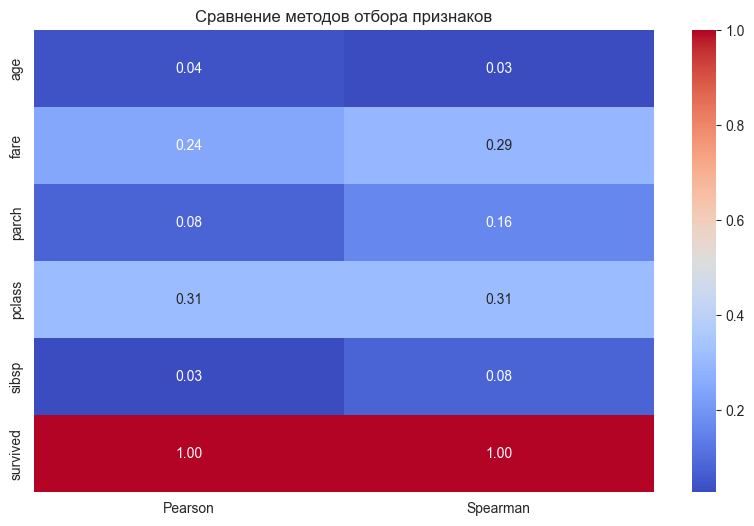

In [1]:
# Задание 5: Сравнение методов отбора признаков.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

titanic = fetch_openml(name='titanic', version=1, as_frame=True)

titanic_df = titanic.data[['pclass', 'age', 'sibsp', 'parch', 'fare']].copy()
titanic_df['survived'] = titanic.target.astype(int)

titanic_df.fillna(titanic_df.median(), inplace=True)

pearson_corr = titanic_df.corr(method='pearson')['survived'].abs().sort_values(ascending=False)
spearman_corr = titanic_df.corr(method='spearman')['survived'].abs().sort_values(ascending=False)

X = titanic_df.drop(columns=['survived'])
y = titanic_df['survived']

results_df = pd.DataFrame({
    'Pearson': pearson_corr,
    'Spearman': spearman_corr
})

print("Сравнение методов отбора признаков:")
print(results_df)

plt.figure(figsize=(10, 6))
sns.heatmap(results_df, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Сравнение методов отбора признаков")
plt.show()


Сравнение корреляций после различных методов предобработки:
        Original  Standardized  Normalized  Log Transformed
pclass  0.312469      0.312469    0.312469         0.311926
fare    0.244414      0.244414    0.244414         0.304799
parch   0.082660      0.082660    0.082660         0.130881
age     0.043818      0.043818    0.043818         0.096250
sibsp   0.027825      0.027825    0.027825         0.032100


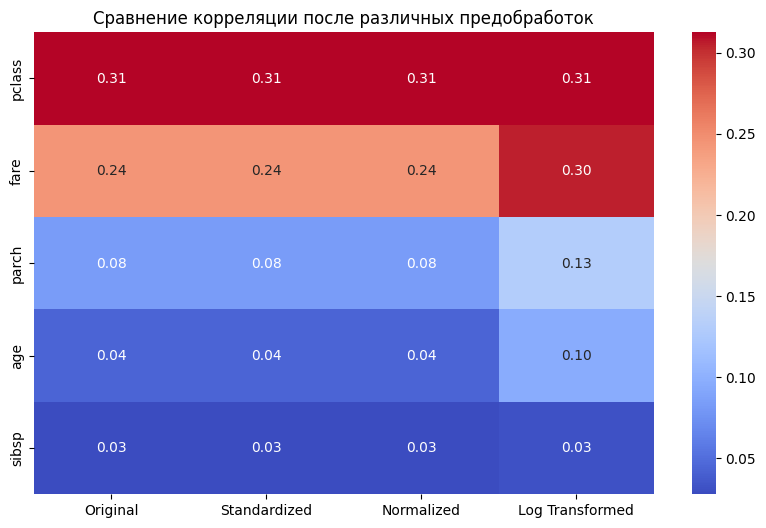

In [13]:
# Задание 6: Исследование влияния предобработки данных на результаты корреляционного анализа.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler, MinMaxScaler

titanic = fetch_openml(name='titanic', version=1, as_frame=True)

titanic_df = titanic.data[['pclass', 'age', 'sibsp', 'parch', 'fare']].copy()

titanic_df['survived'] = titanic.target.astype(int)
titanic_df.fillna(titanic_df.median(), inplace=True)

def apply_transformations(df):
    transformations = {
        'Original': df,
        'Standardized': pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns),
        'Normalized': pd.DataFrame(MinMaxScaler().fit_transform(df), columns=df.columns),
        'Log Transformed': df.apply(lambda x: np.log1p(x) if np.issubdtype(x.dtype, np.number) else x)
    }
    return transformations
X = titanic_df.drop(columns=['survived'])
y = titanic_df['survived']
transformed_data = apply_transformations(X)

correlation_results = {}
for name, data in transformed_data.items():
    correlation_results[name] = data.corrwith(pd.Series(y)).abs().sort_values(ascending=False)

results_df = pd.DataFrame(correlation_results)

print("Сравнение корреляций после различных методов предобработки:")
print(results_df)
plt.figure(figsize=(10, 6))
sns.heatmap(results_df, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Сравнение корреляции после различных предобработок")
plt.show()
